# Mengimport Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as st

# Deskripsi Kolom

- Loan ID : ID pinjaman
- Target : 1 menunjukkan klien dengan pembayaran lebih dari X hari, 0 menunjukkan kasus lainnya
- contract_type : Identifikasi apakah pinjaman tunai atau bergulir
- Gender : jenis kelamin peminjam
- Num_children : jumlah anak peminjam
- income : penghasilan peminjam
- approved_credit : Jumlah kredit pinjaman yang disetujui bank
- annuity : biaya yang harus dibayarkan per bulan
- price : jaminan pinjaman
- income_type : tipe penghasilan peminjam
- housing_type : kondisi rumah peminjam(sewa, tinggal dengan ortu dll)
- days_age : usia peminjam pada saat meminjam
- days_work : jumlah hari kerja peminjam
- days_id_change : jumlah hari sebelum peminjam mengganti registrasinya
- weekdays_apply : Pada hari apa dalam seminggu klien mengajukan pinjaman
- hour_apply : pada jam berapa klien memulai pinjamannya
- organization_type : tipe organisasi tempat peminjam bekerja
- ext score 1, ext score 2, ext score 3 : skor dari data eksternal

# Membaca dataset

In [2]:
df = pd.read_csv(r'D:\purwadhika\lamaran kerja\app_train.csv')

In [3]:
df.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,Secondary / secondary special,Married,With parents,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,State servant,Higher education,Married,House / apartment,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595


In [4]:
Dataset = []
for i in df.columns :
    Dataset.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum()/len(df))*100,2),
        df[i].nunique()
    ])
pd.DataFrame(data = Dataset,
            columns=[
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique'
            ])

,Features,DataType,Null,NullPercentage,Unique
0,Unnamed: 0,int64,0,0.00,61503
1,LN_ID,int64,0,0.00,61503
2,TARGET,int64,0,0.00,2
3,CONTRACT_TYPE,object,0,0.00,2
4,GENDER,object,0,0.00,2
5,NUM_CHILDREN,int64,0,0.00,10
6,INCOME,float64,0,0.00,861
7,APPROVED_CREDIT,float64,0,0.00,3562
8,ANNUITY,float64,1,0.00,9374
9,PRICE,float64,62,0.10,541


# data wrangling
melakukan pengolahan data

In [5]:
df.isna().sum()

Unnamed: 0               0
LN_ID                    0
TARGET                   0
CONTRACT_TYPE            0
GENDER                   0
NUM_CHILDREN             0
INCOME                   0
APPROVED_CREDIT          0
ANNUITY                  1
PRICE                   62
INCOME_TYPE              0
EDUCATION                0
FAMILY_STATUS            0
HOUSING_TYPE             0
DAYS_AGE                 0
DAYS_WORK                0
DAYS_REGISTRATION        0
DAYS_ID_CHANGE           0
WEEKDAYS_APPLY           0
HOUR_APPLY               0
ORGANIZATION_TYPE        0
EXT_SCORE_1          34845
EXT_SCORE_2            134
EXT_SCORE_3          12239
dtype: int64

In [6]:
df.dropna(subset=['ANNUITY','PRICE'],inplace=True)

isi kolom annuity dan price yang missing di hapus karena persentase missingnya yang kecil

In [7]:
df.isna().sum()

Unnamed: 0               0
LN_ID                    0
TARGET                   0
CONTRACT_TYPE            0
GENDER                   0
NUM_CHILDREN             0
INCOME                   0
APPROVED_CREDIT          0
ANNUITY                  0
PRICE                    0
INCOME_TYPE              0
EDUCATION                0
FAMILY_STATUS            0
HOUSING_TYPE             0
DAYS_AGE                 0
DAYS_WORK                0
DAYS_REGISTRATION        0
DAYS_ID_CHANGE           0
WEEKDAYS_APPLY           0
HOUR_APPLY               0
ORGANIZATION_TYPE        0
EXT_SCORE_1          34818
EXT_SCORE_2            134
EXT_SCORE_3          12225
dtype: int64

Kolom EXT_SCORE_1 di drop karena persentase missing valuenya 56% sedangkan kolom EXT_SCORE_2 dan EXT_SCORE_3 dilakukan imputasi data dengan menggunakan median karena data tidak berdistribusi secara normal

In [8]:
df.drop(columns=['EXT_SCORE_1'], inplace=True)

In [9]:
df['EXT_SCORE_2'].quantile(0.5)

0.5659211374852824

<AxesSubplot:xlabel='EXT_SCORE_2', ylabel='Density'>

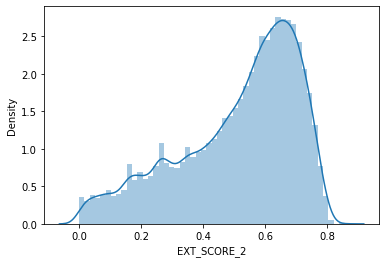

In [10]:
sns.distplot(df['EXT_SCORE_2'])

In [11]:
stat, p = st.jarque_bera(df['EXT_SCORE_2']) # uji normalitas untuk mengetahui data berdistribusi normal atau tidak
if p>0.05:
    print('terima Ho, data berdistribusi normal')
else:
    print('tolak Ho, data tidak berdistribusi normal')

tolak Ho, data tidak berdistribusi normal


In [12]:
df['EXT_SCORE_2'].fillna(df['EXT_SCORE_2'].quantile(0.5), inplace= True) #imputasi missing value

<AxesSubplot:xlabel='EXT_SCORE_3', ylabel='Density'>

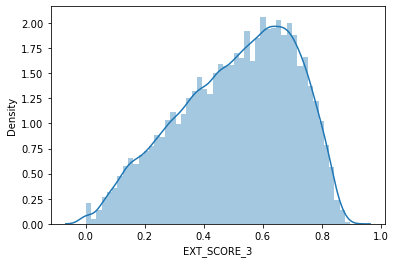

In [13]:
sns.distplot(df['EXT_SCORE_3'])

In [14]:
stat, p = st.jarque_bera(df['EXT_SCORE_3']) # uji normalitas untuk mengetahui data berdistribusi normal atau tidak
if p>0.05:
    print('terima Ho, data berdistribusi normal')
else:
    print('tolak Ho, data tidak berdistribusi normal')

tolak Ho, data tidak berdistribusi normal


In [15]:
df['EXT_SCORE_3'].fillna(df['EXT_SCORE_3'].quantile(0.5), inplace= True) #imputasi missing value

Mengecek duplikasi data

In [16]:
df.duplicated().any()

False

# Feature Selection
melakukan penghapusan kolom yang tidak berpengaruh pada target

In [17]:
df.drop(columns=['Unnamed: 0', 'LN_ID', 'WEEKDAYS_APPLY', 'HOUR_APPLY', 'ORGANIZATION_TYPE'], inplace =True)

In [18]:
df.head()

,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,EXT_SCORE_2,EXT_SCORE_3
0,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,Secondary / secondary special,Married,With parents,-11539,-921,-119.0,-2757,0.608276,0.535276
1,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15743,-4482,-1797.0,-2455,0.684298,0.535276
2,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20775,365243,-8737.0,-4312,0.580687,0.749022
3,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,State servant,Higher education,Married,House / apartment,-20659,-10455,-4998.0,-4010,0.623740,0.710674
4,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-9013,-1190,-3524.0,-1644,0.492994,0.085595


Mengetahui korelasi dari setiap kolom numerikal

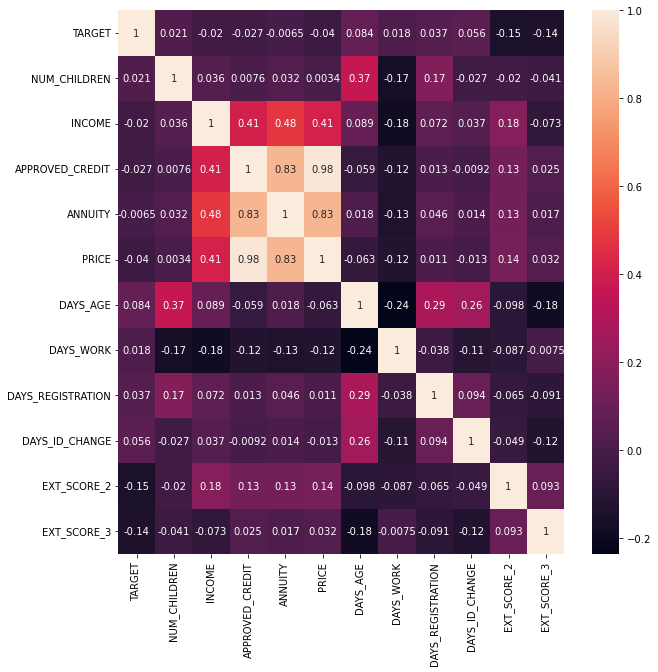

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr('spearman'), annot = True)
plt.show()

Mengetahui korelasi dari setiap kolom kategorikal dengan target

In [20]:
import dython

In [21]:
from dython.nominal import correlation_ratio

In [22]:
col = df.columns[df.dtypes == 'object']

In [23]:
ratio_2 = []

for i in col:
    corr = round(correlation_ratio(df[i], df['TARGET']), 2)
    ratio_2.append(corr)

In [24]:
df_cr_ratio_2 = pd.DataFrame(data = [ratio_2], columns = col, index=['TARGET'])

<AxesSubplot:>

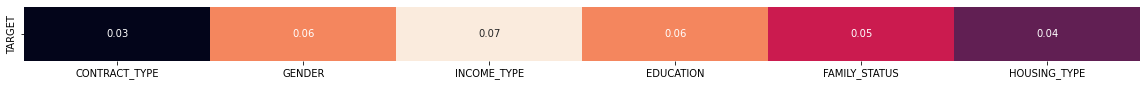

In [25]:
plt.figure(figsize=(20,1))
sns.heatmap(df_cr_ratio_2, annot=True, cbar =False)

Dikarenakan korelasi dari kolom target terhadap kolom numerikal dan kategorikal rendah sehingga feature selection tidak dapat dilakukan dengan menggunakan korelasi

# Feature Engineering


Encoding data kategorikal

In [26]:
df.select_dtypes('object').head()

,CONTRACT_TYPE,GENDER,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE
0,Revolving loans,F,Working,Secondary / secondary special,Married,With parents
1,Cash loans,F,Commercial associate,Secondary / secondary special,Married,House / apartment
2,Cash loans,F,Pensioner,Secondary / secondary special,Married,House / apartment
3,Cash loans,M,State servant,Higher education,Married,House / apartment
4,Revolving loans,M,Commercial associate,Secondary / secondary special,Single / not married,House / apartment


Encoding kolom tipe kontrak menjadi binary encoding

In [27]:
df['CONTRACT_TYPE'].value_counts()

Cash loans         55698
Revolving loans     5742
Name: CONTRACT_TYPE, dtype: int64

In [28]:
def contract_type_change(x):
    if x == 'Cash loans':
        return 1
    else :
        return 0

In [29]:
df['CONTRACT_TYPE'] = df['CONTRACT_TYPE'].apply(contract_type_change)

Encoding kolom gender menjadi binary encoding

In [30]:
df['GENDER'].value_counts()

F    40502
M    20938
Name: GENDER, dtype: int64

In [31]:
def gender_change(x):
    if x == 'M':
        return 1
    else :
        return 0
    

In [32]:
df['GENDER'] = df['GENDER'].apply(gender_change)

Encoding kolom income_type menjadi one hot encoding

In [33]:
df['INCOME_TYPE'].value_counts()

Working                 31576
Commercial associate    14208
Pensioner               11244
State servant            4403
Unemployed                  5
Student                     3
Businessman                 1
Name: INCOME_TYPE, dtype: int64

In [34]:
def income_type_change(x):
    if x == 'Commercial associate':
        return 'wirausaha'
    elif x == 'Businessman':
        return 'wirausaha'
    elif x == 'Unemployed':
        return 'Unemployed'
    elif x == 'Student' :
        return 'Unemployed'
    elif x == 'Working' :
        return 'Pegawai swasta'
    elif x == 'State servant':
        return 'PNS'
    else :
        return 'Pensioner'

In [35]:
df['INCOME_TYPE']= df['INCOME_TYPE'].apply(income_type_change)

In [36]:
df = pd.get_dummies(df, columns=['INCOME_TYPE'])

Encoding kolom education menjadi label encoding

In [37]:
df['EDUCATION'].value_counts()

Secondary / secondary special    43734
Higher education                 14875
Incomplete higher                 2039
Lower secondary                    758
Academic degree                     34
Name: EDUCATION, dtype: int64

In [38]:
def education_change(x):
    if x == 'Lower secondary':
        return 0
    elif x == 'Secondary / secondary special':
        return 1
    elif x == 'Academic degree':
        return 2
    elif x == 'Incomplete higher':
        return 3
    else :
        return 4
df['EDUCATION'] = df['EDUCATION'].apply(education_change)

Encoding kolom family status menjadi one hot encoding

In [39]:
df['FAMILY_STATUS'].value_counts()

Married                 39332
Single / not married     9016
Civil marriage           5873
Separated                3968
Widow                    3251
Name: FAMILY_STATUS, dtype: int64

In [40]:
def family_status_change(x):
    if x== 'Married':
        return 'Married'
    elif x== 'Single / not married':
        return 'Single / not married'
    elif x== 'Civil marriage':
        return 'Married'
    elif x== 'Separated':
        return 'Separated'
    elif x == 'Widow':
        return 'Separated'
df['FAMILY_STATUS'] = df['FAMILY_STATUS'].apply(family_status_change)    

In [41]:
df = pd.get_dummies(df, columns=['FAMILY_STATUS'])

Encoding kolom housing type menjadi one hot encoding

In [42]:
df['HOUSING_TYPE'].value_counts()

House / apartment      54599
With parents            2885
Municipal apartment     2199
Rented apartment         985
Office apartment         534
Co-op apartment          238
Name: HOUSING_TYPE, dtype: int64

In [43]:
df = pd.get_dummies(df, columns=['HOUSING_TYPE'])

pengecekan imbalance data dari kolom target

In [44]:
round(pd.crosstab(df['TARGET'], columns='count', normalize=True)*100, 2)

col_0,count
TARGET,
0,91.92
1,8.08


adanya imbalance data dari kolom target dikarenakan persentase data pinjaman lebih dari waktu yang ditentukan hanya berjumlah sebesar 8%. Dikarenakan adanya imbalance data maka dilakukan undersampling dan oversampling dari data

## Model - Fraud Detection
- class 0 - Non Fraud (Negatif)
- Class 1 - fraud(positif)
- yang akan dihindari - diminimalisir adalah Error **False Negatif** -- **Aktual Fraud** tetapi diprediksi **non fraud**
- semakin tinggi nilai recall semakin rendah false negatif
- berarti model akan berfokus di recall

In [45]:
# Model akan berfokus di Recall Class 1 (recall positiif)

# Machine Learning Logistic Regression

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [47]:
X = df.drop(columns=['TARGET'])
y= df['TARGET']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state =42)

In [49]:
LR = LogisticRegression()

In [50]:
LR.fit(X_train, y_train)

LogisticRegression()

In [51]:
def Eva_Matrix_Base_Class(model, X_train, X_test, y_train, y_test, Nama):
    Model = model.fit(X_train, y_train)
    y_pred_train = Model.predict(X_train)
    Acc_train = accuracy_score(y_train, y_pred_train)
    Rec_train = recall_score(y_train, y_pred_train)
    Prec_train = precision_score(y_train, y_pred_train)
    F1_train = f1_score(y_train, y_pred_train)
    y_pred_test = Model.predict(X_test)
    Acc_test = accuracy_score(y_test, y_pred_test)
    Rec_test = recall_score(y_test, y_pred_test)
    Prec_test = precision_score(y_test, y_pred_test)
    F1_test = f1_score(y_test, y_pred_test)
    data_LR = {
    Nama + "Training" : [Acc_train, Rec_train, Prec_train, F1_train],
    Nama + "Testing" : [Acc_test, Rec_test, Prec_test, F1_test]
}

    df = pd.DataFrame(data_LR, index=["Accuracy", "Recall", "Precision", "F1"])
    cr_tr = classification_report(y_train, y_pred_train)
    cm_tr = confusion_matrix(y_train, y_pred_train, labels=[1, 0])
    df_tr = pd.DataFrame(data = cm_tr, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
    cr_ts = classification_report(y_test, y_pred_test)
    cm_ts = confusion_matrix(y_test, y_pred_test, labels=[1, 0])
    df_ts = pd.DataFrame(data = cm_ts, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
    return df, cr_tr, df_tr, cr_ts, df_ts

In [52]:
df_LR, cr_LR_tr, cm_LR_tr, cr_LR_ts, cm_LR_ts = Eva_Matrix_Base_Class(LR, X_train, 
                                                                      X_test, 
                                                                      y_train, 
                                                                      y_test, 
                                                                      "LR")

In [53]:
df_LR

,LRTraining,LRTesting
Accuracy,0.91923,0.919189
Recall,0.00000,0.000000
Precision,0.00000,0.000000
F1,0.00000,0.000000


In [54]:
print(cr_LR_tr) 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     45182
           1       0.00      0.00      0.00      3970

    accuracy                           0.92     49152
   macro avg       0.46      0.50      0.48     49152
weighted avg       0.84      0.92      0.88     49152



In [55]:
print(cr_LR_ts) #hasil recallnya masih cukup buruk

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11295
           1       0.00      0.00      0.00       993

    accuracy                           0.92     12288
   macro avg       0.46      0.50      0.48     12288
weighted avg       0.84      0.92      0.88     12288



In [56]:
 cm_LR_tr

,Pred 1,Pred 0
Akt 1,0,3970
Akt 0,0,45182


In [57]:
 cm_LR_ts

,Pred 1,Pred 0
Akt 1,0,993
Akt 0,0,11295


## Kesimpulan
- recall dari data training dan data testing untuk kasus fraud masih sangat buruk dikarenakan hasilnya nol
- Error atau false negatifnya masih sangat besar yang berarti mesin belum bisa mendeteksi peminjaman yang telat bayar (Fraud)

# Machine Learning Logistic Regression With Undersampling and oversampling

## 1. Logistic Regression with Over sampling

In [58]:
from sklearn.utils import resample

In [59]:
df_train = pd.concat([X_train, y_train], axis =1)
df_train.head()

,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,EDUCATION,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,EXT_SCORE_2,EXT_SCORE_3,INCOME_TYPE_PNS,INCOME_TYPE_Pegawai swasta,INCOME_TYPE_Pensioner,INCOME_TYPE_Unemployed,INCOME_TYPE_wirausaha,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,HOUSING_TYPE_Co-op apartment,HOUSING_TYPE_House / apartment,HOUSING_TYPE_Municipal apartment,HOUSING_TYPE_Office apartment,HOUSING_TYPE_Rented apartment,HOUSING_TYPE_With parents,TARGET
32243,1,0,1,112500.0,135000.0,8626.5,135000.0,4,-12901,-1594,-4190.0,-1517,0.636117,0.479449,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
40395,0,0,0,103500.0,180000.0,9000.0,180000.0,1,-13402,-1300,-1120.0,-4672,0.217355,0.169429,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
41115,1,1,1,202500.0,1321902.0,42772.5,1035000.0,1,-15014,-1146,-9128.0,-4406,0.629868,0.665855,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
18088,1,1,0,215100.0,787086.0,25389.0,657000.0,1,-19175,-1285,-10933.0,-399,0.744191,0.576209,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
1271,1,1,0,135000.0,652500.0,21046.5,652500.0,1,-19049,-5733,-2541.0,-2563,0.438485,0.619528,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [60]:
non_fraud = df_train[df_train['TARGET']==0]
len(non_fraud)

45182

In [61]:
fraud= df_train[df_train['TARGET']==1]
len(fraud)

3970

In [62]:
fraud_oversample = resample(fraud, 
                           replace = True, 
                           n_samples = len(non_fraud),
                            random_state =42
                           )

In [63]:
fraud_oversample.head()

,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,EDUCATION,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,EXT_SCORE_2,EXT_SCORE_3,INCOME_TYPE_PNS,INCOME_TYPE_Pegawai swasta,INCOME_TYPE_Pensioner,INCOME_TYPE_Unemployed,INCOME_TYPE_wirausaha,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,HOUSING_TYPE_Co-op apartment,HOUSING_TYPE_House / apartment,HOUSING_TYPE_Municipal apartment,HOUSING_TYPE_Office apartment,HOUSING_TYPE_Rented apartment,HOUSING_TYPE_With parents,TARGET
3780,1,1,0,157500.0,473760.0,53581.5,450000.0,1,-9638,-1186,-4433.0,-1754,0.780145,0.493863,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1
6718,1,1,1,315000.0,640080.0,31261.5,450000.0,1,-15291,-1643,-7469.0,-2883,0.645223,0.151935,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
24196,1,1,0,180000.0,450000.0,21109.5,450000.0,1,-14258,-1544,-1898.0,-4986,0.471032,0.681706,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
28978,1,0,1,103500.0,430582.5,28903.5,355500.0,0,-12281,-1474,-2450.0,-1856,0.077646,0.461482,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
43299,1,0,0,247500.0,894249.0,32251.5,693000.0,1,-14200,-802,-1407.0,-3422,0.632719,0.056092,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1


In [64]:
df_oversample = pd.concat([non_fraud, fraud_oversample])

In [65]:
df_oversample['TARGET'].value_counts()

0    45182
1    45182
Name: TARGET, dtype: int64

In [66]:
X_train_OS = df_oversample.drop(columns='TARGET')
y_train_OS = df_oversample['TARGET']
LR_OS = LogisticRegression()

In [67]:
df_LR_OS, cr_LR_OS_tr, cm_LR_OS_tr, cr_LR_OS_ts, cm_LR_OS_ts = Eva_Matrix_Base_Class(LR_OS, X_train_OS, 
                                                                      X_test, 
                                                                      y_train_OS, 
                                                                      y_test, 
                                                                      "LR_OS")

In [68]:
df_LR_OS

,LR_OSTraining,LR_OSTesting
Accuracy,0.578217,0.589111
Recall,0.560953,0.580060
Precision,0.581014,0.110599
F1,0.570808,0.185776


In [69]:
print(cr_LR_OS_tr)

              precision    recall  f1-score   support

           0       0.58      0.60      0.59     45182
           1       0.58      0.56      0.57     45182

    accuracy                           0.58     90364
   macro avg       0.58      0.58      0.58     90364
weighted avg       0.58      0.58      0.58     90364



In [70]:
print(cm_LR_OS_tr)

       Pred 1  Pred 0
Akt 1   25345   19837
Akt 0   18277   26905


In [71]:
print(cr_LR_OS_ts)

              precision    recall  f1-score   support

           0       0.94      0.59      0.73     11295
           1       0.11      0.58      0.19       993

    accuracy                           0.59     12288
   macro avg       0.53      0.58      0.46     12288
weighted avg       0.87      0.59      0.68     12288



In [72]:
cm_LR_OS_ts

,Pred 1,Pred 0
Akt 1,576,417
Akt 0,4632,6663


In [73]:
cm_LR_ts # algoritma awal logistic regression

,Pred 1,Pred 0
Akt 1,0,993
Akt 0,0,11295


## Kesimpulan
- recall dari data training dan data testing untuk kasus fraud sudah lumayan baik dikarenakan hasilnya 0.58, namun mungkin dapat ditingkatkan lagi dengan tuning
- Error atau false negatifnya mengecil yang berarti mesin mulai bisa mendeteksi peminjaman yang telat bayar (Fraud)

## 2. Logistic Regression with Over sampling and tuning

In [74]:
param_c = np.arange(0.01, 5, 0.01)

In [75]:
def Manual_Tune(C, X_train, X_test, y_train, y_test, Model, Reg, slvr):
    train_acc = []
    test_acc = []
    if slvr == 'elasticnet':
        Reg=0.5
    else :
        rat= None
    
    for i in C:
        model_R = Model(C=i, penalty=Reg, solver=slvr, l1_ratio=0.5) #solver metode menurunkan error
        model_R.fit(X_train, y_train) #l1 ratio itu komposisi lasso dari elastic net
        y_pred_tr = model_R.predict(X_train)
        Rc_train = recall_score(y_train, y_pred_tr)
        train_acc.append(Rc_train)
        y_pred_ts = model_R.predict(X_test)
        Rc_test = recall_score(y_test, y_pred_ts)
        test_acc.append(Rc_test)
    return train_acc, test_acc

In [76]:
#penalti regularization = l2 = ridge

In [77]:
train_LR, test_LR, = Manual_Tune(param_c, X_train_OS, X_test, y_train_OS, y_test, LogisticRegression, 'l2', 'lbfgs')

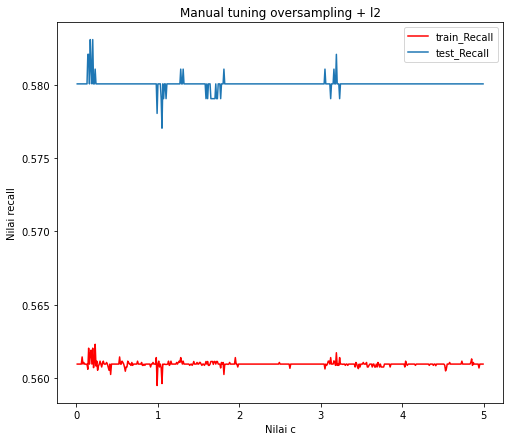

In [78]:
plt.figure(figsize=(8,7))
plt.plot(param_c, train_LR, color='red')
plt.plot(param_c, test_LR)
plt.legend(['train_Recall', 'test_Recall'])
plt.title('Manual tuning oversampling + l2')
plt.xlabel('Nilai c')
plt.ylabel('Nilai recall')
plt.show()

In [79]:
print('max Recall :', np.max(test_LR))

max Recall : 0.5830815709969789


In [80]:
# penalti regularization =l1 = lasso

In [81]:
train_LR_l1, test_LR_l1 = Manual_Tune(param_c, X_train_OS, X_test, y_train_OS, y_test, LogisticRegression, 'l1', 'liblinear')

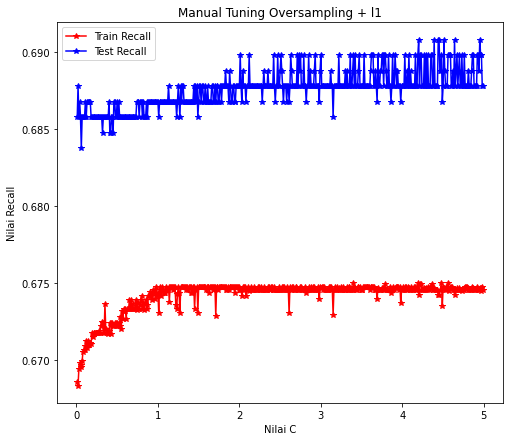

In [82]:
plt.figure(figsize=(8,7))
plt.plot(param_c, train_LR_l1, 'r*-')
plt.plot(param_c, test_LR_l1, 'b*-')
plt.legend(['Train Recall', 'Test Recall'])
plt.title("Manual Tuning Oversampling + l1")
plt.xlabel("Nilai C")
plt.ylabel("Nilai Recall")
plt.show()

In [83]:
print('max Recall :', np.max(test_LR_l1))

max Recall : 0.6908358509566969


In [84]:
print('index c max :', np.argmax(test_LR_l1))

index c max : 419


In [85]:
param_c[np.argmax(test_LR_l1)]

4.2

In [86]:
#penalti regularization elastic net

In [87]:
train_LR_enet, test_LR_enet = Manual_Tune(param_c, X_train_OS , X_test, y_train_OS, y_test, LogisticRegression, 'elasticnet', 'saga')

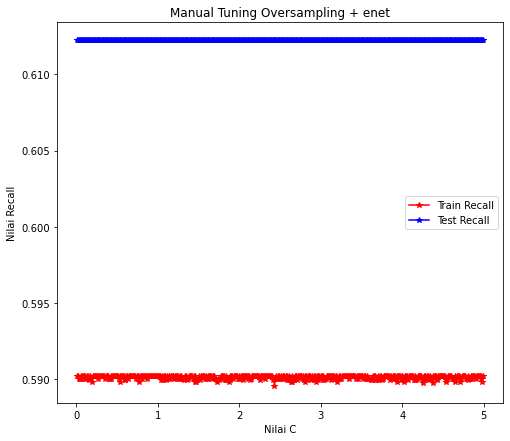

In [88]:
plt.figure(figsize=(8,7))
plt.plot(param_c, train_LR_enet, 'r*-')
plt.plot(param_c, test_LR_enet, 'b*-')
plt.legend(['Train Recall', 'Test Recall'])
plt.title("Manual Tuning Oversampling + enet")
plt.xlabel("Nilai C")
plt.ylabel("Nilai Recall")
plt.show()

In [89]:
print("max Recall", np.max(test_LR_enet))

max Recall 0.6122860020140987


In [90]:
# fine tuning

In [91]:
param_c_2 = np.arange(3, 5, 0.001)

In [ ]:
train_LR_2, test_LR_2 = Manual_Tune(param_c_2, X_train_OS, X_test, y_train_OS, y_test, LogisticRegression, 'l1', 'liblinear')

In [ ]:
plt.figure(figsize=(8,7))
plt.plot(param_c_2, train_LR_2, 'r*-')
plt.plot(param_c_2, test_LR_2, 'b*-')
plt.legend(['Train Recall', 'Test Recall'])
plt.title("Manual Tuning Oversampling + l1")
plt.xlabel("Nilai C")
plt.ylabel("Nilai RECALL")
plt.show()

In [ ]:
print('Max Recall:', np.max(test_LR_2))

In [ ]:
param_c_2[np.argmax(test_LR_2)]

Algoritma yang dipilih adalah Logistic Regression dengan oversampling dan tuning lasso dikarenakan besarnya recall mencapai 69%. Dengan recall yang sebesar 69% dapat diketahui bahwa potensi fraud dalam pembayaran dapat dideteksi oleh algoritma sistem